# 데이터 분석

타이타닉 데이터셋
- 1912년 타이타닉호에 탑승했던 탑승객 중 일부 데이터 (생존여부 포함)를 학습
- 생존에 기여한 데이터 특성을 발견
- 테스트 데이터에 대하여 90% 이상의 정확도로 생존률을 예측하는 머신러닝 모델 개발


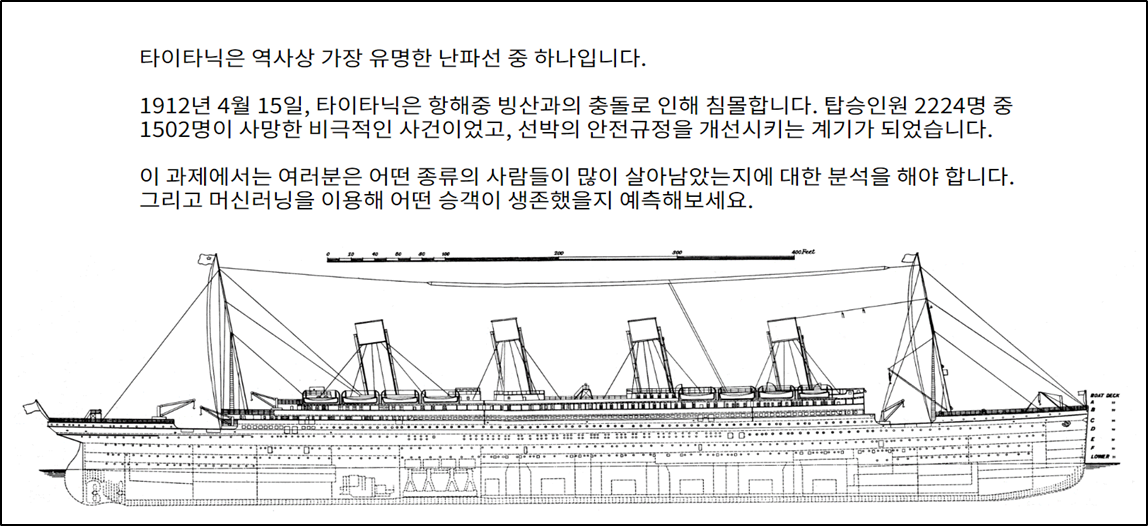

설명 및 데이터 출처:  https://dacon.io/competitions/open/235539/overview/description


### 라이브러리 import

In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#타이타닉 데이터셋 로드
import seaborn as sns

from sklearn import preprocessing

**타이타닉 데이터 분석 준비사항**
- Colab과 Google Drive 활용
- Google drive의 홈에 /SeSAC 과 /SeSAC/Data - 디렉토리를 생성한다.
- 아래 github에서 test.csv와 train.csv를 다운받아 /SeSAC/Data/titanic에 업로드 한다.
  https://github.com/Harksu71/DataScienceAnalytics/tree/main/data/titanic


## 데이터 준비

### 데이터 로드 및 데이터 프레임화

In [565]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
colab_path = "/content/drive/My Drive/Sesac/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [566]:
# 데이터 파일 로드 (데이타는 /SeSAC/Data/titanic/ 디렉토리에 파일을 업로드 한다)
df_train = pd.read_csv(colab_path + 'titanic_train.csv')
df_test = pd.read_csv(colab_path + 'titanic_test.csv')
print("학습데이터: {}건, 테스트용 데이터: {}건".format(len(df_train), len(df_test)))

학습데이터: 891건, 테스트용 데이터: 418건


### 데이터 구조 확인

In [438]:
# 데이터 샘플 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [439]:
# 데이터 dimension 확인
df_train.shape

(891, 12)

In [440]:
# 데이터의 개략적인 정보 확인
# df_train.columns
# df_train.dtypes
# df_train.info()
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature (파생변수, 독립변수)와 Label (Target, 목적변수, 종속변수) 확인

타이타닉 학습용 데이터 (이하 df_train) 에서 최종적으로 예측해야 할 변수는 ‘Survived’ 필드이다.  본 과정에서는 이를 Label이라 지칭하며 Target, 목적변수, 종속변수라도 한다. ‘Survived’를 제외한 나머지 필드는 ML 모델에 사용될 Feature로 활용한다 (파생변수, 독립변수라고도 한다).


‘Survived’의 구성요소 값  0, 1에 대해서는 데이터 description을 참고하여 의미를 확실히 하도록 한다. (0: 사망, 1: 생존) https://www.kaggle.com/datasets/euclidsoft/titianic

In [441]:
# 구성 값 확인
# df_train['Survived'].unique()

# value_counts()는 Series의 unique value를 count해주는 함수
# df_train['Survived'].value_counts()

# value_counts() 결과값을 percent 정보로 변환
(df_train['Survived'].value_counts()/len(df_train)*100).round(2)

,count
Survived,
0,61.62
1,38.38


각 Feature에 대하여 Part 3에서 살펴본 다양한 전처리 기법인 결측치, 이상치, 정규화, 인코딩 처리를 하여 학습데이터를 준비한다.

### 결측치 확인

In [567]:
# 결측치 확인
#df_train.isnull().sum() #결측치의 개수
df_train.isnull().mean()*100 #결측치를 percentage로 확인

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [568]:
# NaN 갯수 확인
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#### 결측치 처리 - Embarked

In [569]:
# 결측치 확인
df_train.loc[df_train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [570]:
# Pclass 1의 Embarked data 종류 및 갯수 확인
df_embarked_ch = df_train[df_train['Pclass'] == 1]
df_embarked_ch[['Pclass', 'Embarked']].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
Name: count, dtype: int64

In [571]:
# Cabin이 B인 사람들의 Embarked data 확인
df_embarked_ch = df_train.loc[df_train['Cabin'].str.contains('B', na=False)]
df_embarked_ch['Embarked'].value_counts()

,count
Embarked,
S,23
C,22


전체적으로는 S의 비율이 훨씬 높지만, Cabin = B인 사람들은 S와 C의 비율은 거의 같음.
이 때 주변 Cabin번호 분석 시 가장 가까운 B29가 C이므로 C로 대체

In [572]:
# 결측치 처리(대체) - Embarked
df_train['Embarked'] = df_train['Embarked'].fillna('C')

In [573]:
# 결측치 확인
df_train.loc[df_train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### 결측치 처리 - Age

In [574]:
# Age가 NaN인 사람들의 생존 결과
df_age = df_train[df_train['Age'].isnull() == True]
df_age['Survived'].value_counts()

,count
Survived,
0,125
1,52


age가 NaN인 것과 생존 여부는 별로 상관 없어 보임

In [575]:
# 호칭에 따른 탑승객 분류
df_train['Name'].str.extract("([A-Za-z]+)\.").value_counts(dropna=False)

,count
0,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [576]:
# Age가 NaN인 탑승객을 호칭에 따라 분류
df_age['Name'].str.extract("([A-Za-z]+)\.").value_counts(dropna=False)

,count
0,
Mr,119
Miss,36
Mrs,17
Master,4
Dr,1


In [577]:
# Mr, Master, Mrs, Miss, Dr가 포함되지 않는 이름들 중 Survived의 비율
df_name = df_train.loc[~df_train['Name'].str.contains('Master\. | Mr\. | Mrs\. | Miss\. | Dr\.')]
df_name['Survived'].value_counts()

,count
Survived,
0,11
1,9


호칭에 따른 Age를 예측하기 위해 각 호칭 별로 정리. Age = NaN인 data 중 호칭은 Master, Mr, Mrs, Miss, Dr 존재. 전체 data에는 이 외에도 여러 다른 호칭들이 존재하며 이는 대부분 성직자, 귀족, 군인과 같은 신분에 따른 특수한 호칭.

이러한 신분은 생존 여부에 영향을 줄 수 있고, 실제로 이들의 생존 비율도 11:9로 전체 생존 비율과 많은 차이가 존재하기에 특수 호칭 탑승객들은 제외하고 Master, Mr, Mrs, Miss, Dr의 평균나이를 계산하여 결측치 처리

In [578]:
# 결측치 처리 - 전체 Master 평균 나이
df_age = df_train[['Age', 'Name', 'Survived']]
replace_age = df_age.loc[df_age['Name'].str.contains('Master\.')]['Age'].mean()
replace_age = round(replace_age, 1)

df_train.loc[df_train['Name'].str.contains('Master\.')] = df_train.loc[df_train['Name'].str.contains('Master\.')].fillna({'Age' : replace_age})

In [579]:
# 결측치 처리 확인 - Master
df_train.loc[df_train['Name'].str.contains('Master\.').isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [580]:
# 결측치 처리 - 전체 Mr 평균 나이
df_age = df_train[['Age', 'Name', 'Survived']]
replace_age = df_age.loc[df_age['Name'].str.contains('Mr\.')]['Age'].mean()
replace_age = round(replace_age, 1)

df_train.loc[df_train['Name'].str.contains('Mr\.')] = df_train.loc[df_train['Name'].str.contains('Mr\.')].fillna({'Age' : replace_age})

In [581]:
# 결측치 처리 확인 - Mr
df_train.loc[df_train['Name'].str.contains('Mr\.').isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [582]:
# 결측치 처리 - 전체 Mrs 평균 나이
df_age = df_train[['Age', 'Name', 'Survived']]
replace_age = df_age.loc[df_age['Name'].str.contains('Mrs\.')]['Age'].mean()
replace_age = round(replace_age, 1)

df_train.loc[df_train['Name'].str.contains('Mrs\.')] = df_train.loc[df_train['Name'].str.contains('Mrs\.')].fillna({'Age' : replace_age})

In [583]:
# 결측치 처리 확인 - Mrs
df_train.loc[df_train['Name'].str.contains('Mrs\.').isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [584]:
# 결측치 처리 - 전체 Miss 평균 나이
df_age = df_train[['Age', 'Name', 'Survived']]
replace_age = df_age.loc[df_age['Name'].str.contains('Miss\.')]['Age'].mean()
replace_age = round(replace_age, 1)

df_train.loc[df_train['Name'].str.contains('Miss\.')] = df_train.loc[df_train['Name'].str.contains('Miss\.')].fillna({'Age' : replace_age})

In [585]:
# 결측치 처리 확인 - Miss
df_train.loc[df_train['Name'].str.contains('Miss\.').isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [586]:
# 결측치 처리 - 전체 Dr 평균 나이
df_age = df_train[['Age', 'Name', 'Survived']]
replace_age = df_age.loc[df_age['Name'].str.contains('Dr\.')]['Age'].mean()
replace_age = round(replace_age, 1)

df_train.loc[df_train['Name'].str.contains('Dr\.')] = df_train.loc[df_train['Name'].str.contains('Dr\.')].fillna({'Age' : replace_age})

In [587]:
# 결측치 처리 확인 - Dr
df_train.loc[df_train['Name'].str.contains('Dr\.').isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### 결측치 처리 - Cabin

결측치가 77.1%나 되는 ‘Cabin(객실번호)’ 필드의 경우, Cabin 값이 결측된 데이터를 모두 분석에서 제외시킬지, 대체하여 사용할지, 해당 필드를 Feature에서 제거할지 결정해야 한다.
‘Cabin’값을 대체할 만한 정보가 있을지 살펴보자


In [588]:
# Cabin에 따른 Pclass
df_cabin = df_train[['Pclass', 'Cabin']].dropna()

for p in range(1, 4):

  cabin_values = df_cabin[df_cabin['Pclass'] == p]['Cabin'].sort_values().values
  print(f"class {p} : {cabin_values}\n")

class 1 : ['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B18' 'B19' 'B20' 'B20' 'B22' 'B22'
 'B28' 'B28' 'B3' 'B30' 'B35' 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42'
 'B49' 'B49' 'B5' 'B5' 'B50' 'B51 B53 B55' 'B51 B53 B55' 'B57 B59 B63 B66'
 'B57 B59 B63 B66' 'B58 B60' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B77' 'B78'
 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'B96 B98' 'B96 B98' 'B96 B98'
 'C101' 'C103' 'C104' 'C106' 'C110' 'C111' 'C118' 'C123' 'C123' 'C124'
 'C124' 'C125' 'C125' 'C126' 'C126' 'C128' 'C148' 'C2' 'C2' 'C22 C26'
 'C22 C26' 'C22 C26' 'C23 C25 C27' 'C23 C25 C27' 'C23 C25 C27'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C52' 'C54'
 'C62 C64' 'C65' 'C65' 'C68' 'C68' 'C7' 'C70' 'C78' 'C78' 'C82' 'C83'
 'C83' 'C85' 'C86' 'C87' 'C90' 'C91' 'C92' 'C92' 'C93' 'C93' 'C95' 'C99'
 'D10 D12' 'D11' 'D15' 'D17' 'D17' 'D19' 'D20' 'D20' 'D21' 'D26' 'D26'
 'D28' 'D30' 'D33' 'D33' 'D35' 'D35' 'D36' 'D36' 'D37' '

‘Cabin’의 실제 데이터를 살펴보면 객실 번호 자체가 모델 성능에 결정적인 영향을 미칠 것으로 기대되지 않으며, 어느 정도 ‘Pclass(등실의 등급)’ 과 관련이 있을 것으로 추정되어, ‘Cabin’ 필드를 분석 대상에서 제외 ‘Pclass’정보를 활용하기로 결정한다.  

In [589]:
# 결측치 처리(해당 Feature 분석에서 제외) - Cabin
df_train = df_train.drop(columns=['Cabin'])

#### 결측치 처리 결과 확인

In [590]:
# 결측치 처리 결과 확인
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### 이상값 처리

이상값 확인에 앞서, Cardinality가 상대적으로 낮고 (unique 값이 많지 않고), 정규분포를 따르지 않는 것으로 파악되는 변수 (‘Age‘, ‘Sex’, ‘SibSp’, ‘Parch’에 대해서 살펴본다.


In [591]:
# Pclass(등급) unique값
df_train['Pclass'].value_counts().sort_index()

,count
Pclass,
1,216
2,184
3,491


In [592]:
# Sex(성별) unique값
df_train['Sex'].value_counts().sort_index()

,count
Sex,
female,314
male,577


In [593]:
# SibSp(함께 탑승한 형제, 자매, 아내, 남편의 수) unique값
df_train['SibSp'].value_counts().sort_index()

,count
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [594]:
# Parch(함께 탑승한 부모, 자식의 수) unique값
df_train['Parch'].value_counts().sort_index()

,count
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


다른 승객보다 함께 탑승한 형제, 자매/부모, 자식의 수가 많은 (IQR이나 z-score기준 threshold에서 벗어나는)  승객이 존재하나 수집당시 오류가 있었다고 볼 근거가 없으므로, 정상치로 취급한다.

연속형 실수 값을 가지는 ‘Age‘, ‘Fare’가 이상치를 가지는지 살펴본다.

([<matplotlib.axis.XTick at 0x7ccec2871190>,
 [Text(1, 0, 'Age'), Text(2, 0, 'Fare')])

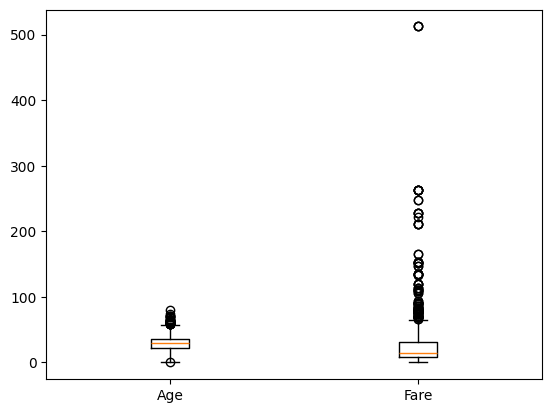

In [595]:
# Age, Fare 값 BoxPlot으로 확인
plt.boxplot([df_train['Age'], df_train['Fare']])
plt.xticks([1, 2],['Age', 'Fare'])

두 Feature 모두 통계상의 이상치를 가지고 있으나, ‘Age‘의 경우 인간의 수명 범위내 임을 알 수 있어서,  ‘Fare’ 데이터에 대해서만 더 자세히 살펴본다. ‘Fare’는  티켓운임을 감안하여 ‘Pclass’와 함께 살펴본다.


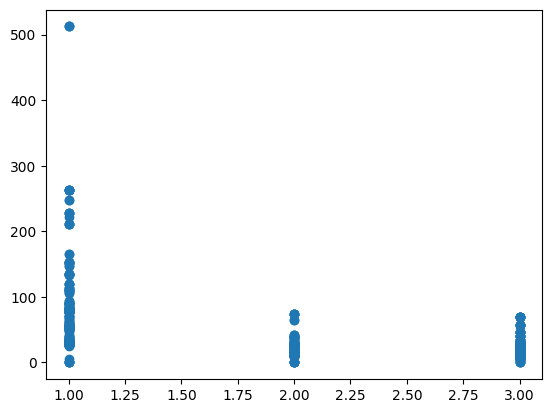

In [596]:
# Fare 데이터 자세히 들여다보기 - Pclass별로
plt.scatter(df_train['Pclass'], df_train['Fare'])

In [597]:
# Fare 데이터 자세히 들여다보기 - 실제 샘플 확인
df_train.sort_values(by=['Fare'], ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S


실제 티켓의 운임으로 보인다. 본 실습에 주어진 데이터에는 이상치가 없다고 판단, 다음 단계로 넘어간다.

### 전처리 데이터 저장

In [598]:
# NaN 갯수 확인
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [599]:
df_train.to_csv(f"{colab_path}titanic_train_preprocessing_done.csv", index=False)

In [602]:
# 데이터 파일 로드 (전처리한 data)
df_train = pd.read_csv(colab_path + 'titanic_train_preprocessing_done.csv')

In [603]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.8,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### 정규화

In [608]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


연속형 실수 값을 가지는 ‘Age‘, ‘Fare’'에 대해서만 정규화를 적용해본다. 정규화의 경우, 학습 데이터 기준으로 생성한 Scaler를 테스트 데이터에 그대로 적용해야 하는 것에 주의해야 한다.

In [609]:
# Age, Fare에 대해 z-score 정규화
columns_to_scale = ['Age', 'Fare']
scaler_train = preprocessing.StandardScaler()
# 나중에 테스트 데이터에 적용하기 위하여 fit와 transform(저장) 단계를 분리.
scaler_train = scaler_train.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.584799,1,0,A/5 21171,-0.502445,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.620953,1,0,PC 17599,0.786845,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.283361,0,0,STON/O2. 3101282,-0.488854,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.394874,1,0,113803,0.420730,S
4,5,0,3,"Allen, Mr. William Henry",male,0.394874,0,0,373450,-0.486337,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.208001,0,0,211536,-0.386671,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.810877,0,0,112053,-0.044381,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.599871,1,2,W./C. 6607,-0.176263,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.283361,0,0,111369,-0.044381,C


### 인코딩

In [610]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### 인코딩 - Sex, Embarked

object형 변수인 ‘Sex’와 ‘Embarked’에 대해 One-Hot 인코딩


In [611]:
# Sex(성별), Embarked(배에 탑승한 위치) 데이터 인코딩
df_train = pd.get_dummies(df_train, columns = ['Sex', 'Embarked'])
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.584799,1,0,A/5 21171,-0.502445,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.620953,1,0,PC 17599,0.786845,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.283361,0,0,STON/O2. 3101282,-0.488854,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.394874,1,0,113803,0.420730,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.394874,0,0,373450,-0.486337,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.208001,0,0,211536,-0.386671,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.810877,0,0,112053,-0.044381,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.599871,1,2,W./C. 6607,-0.176263,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-0.283361,0,0,111369,-0.044381,False,True,True,False,False


#### 인코딩 - Ticket

In [613]:
# Ticket 데이터 살펴보기
df_train['Ticket'].sort_values().values[-10:]

array(['W./C. 6607', 'W./C. 6608', 'W./C. 6608', 'W./C. 6608',
       'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735', 'WE/P 5735'], dtype=object)

‘Ticket’ 데이터는 Cardinality가 너무 높고, 분석에 의미 있게 사용될 것 같지도 않고, 찾아보니 걍 발급처나 Pclass값이라는데 Pclass 말짱하게 다 있으니까 걍 Drop

In [615]:
# Name, Ticket 필드 분석에서 제외
df_train = df_train.drop(columns=['Ticket'])

#### 인코딩 - Name

In [626]:
df_name = df_train[['Name', 'Survived']]

In [628]:
df_name['Name'].str.extract("([A-Za-z]+)\.").value_counts()

,count
0,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
df_embarked_ch = df_train[df_train['Pclass'] == 1]
df_embarked_ch[['Pclass', 'Embarked']].value_counts() # 동시 선택 value_counts()

In [633]:
# 호칭에 따른 생존 비율
df_name['Name'] = df_name(df_name['Name'].str.extract("([A-Za-z]+)\."))
df_name[['Pclass', 'Embarked']].value_counts()

TypeError: 'DataFrame' object is not callable

‘Mr’, “Miss’ ‘Mrs’ 등의 호칭은 ‘Sex(성별)’ 필드에서도 충분히 얻을 수 있는 정보이므로 직업/사회적 지위를 나타내는
호칭을 포함하는 경우 ‘Name_has_title’이라는 이름으로 Flag를 생성해보자

In [ ]:
# Name에 포함된 호칭 추출하여 확인
# 정규표현식은 학습범위를 벗어나므로 결과만을 참고한다.
df_train['Name'].str.extract("([A-Za-z]+)\.").value_counts(dropna=False)

,count
0,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
# 이름에 'Master', 'Dr', 'Rev(목사)', 'Major', 'Col(대령)', 'Capt', 'Jonkheer(귀족)', 'Don', 'Countess(백작)', 'Sir＇ 포함 여부를 Flag화 한다.
df_train['Name_has_title'] = df_train['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

PassengerId, Pclass, Survived, SibSp, Parch는 int형이고, 연속값도 아니며, 그 자체로 유효한 data라 판단했기에 정규화나 one-hot 인코딩 X

## 텍스트 분석

분석 대상이 비정형/반정형 텍스트 데이터의 경우
- 데이터 스토어에서 필요한 텍스트 데이터를 추출
- 어휘/구문 분석, 감성 분석, 토픽 분석, 오피니언 분석, 소셜 네트워크 분석 등을 실시
- 텍스트 분석 결과는 모델링 태스크와 연동하여 프로젝트 목적에 부합하는 최종 모델을 구축한다.


본 프로젝트에서는  전처리 단계에서 Name 필드로부터 의미 있는 Feature를 추출한 정도 이외에는) 텍스트 마이닝이 필요할 정도의 비정형 데이터를 포함하지 않아 텍스트 분석 단계를 거치지 않음


## 탐색적 분석

탐색적 분석 단계 빅데이터 분석 방법론
- 다양한 관점으로 평균, 분산 등 기초 통계량을 산출하여 데이터의 분포와 변수 간의 관계 등 데이터 자체의 특성과 통계적 특성을 파악한다.
- 시각화를 탐색적 데이터 분석을 위한 도구로 활용하여 데이터의 가독성을 높임


*   데이터 전처리 과정에서 진행한 data 분석은 결손치 및 이상치를 처리하기 위한
*   탐색적 분석 단계에서 진행하는 data 분석은 적합한 model을 선택하기 위한 data 분석

### 산포도 분석

개별 Feature에 대한 데이터 탐색은 전처리 과정에서 충분히 살펴보았으므로 여기에서는 관심대상인 ‘Survived’ 값과의 관계를 탐색해본다.

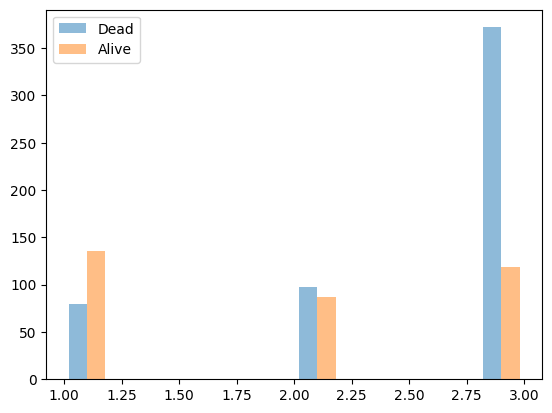

In [560]:
# Pclass에 따른 Survived(사망자/생존자) 분포
hist1 = df_train[df_train['Survived']==0]['Pclass']
hist2 = df_train[df_train['Survived']==1]['Pclass']
plt.hist([hist1, hist2], label=['Dead', 'Alive'], alpha=0.5)
plt.legend(loc=0)

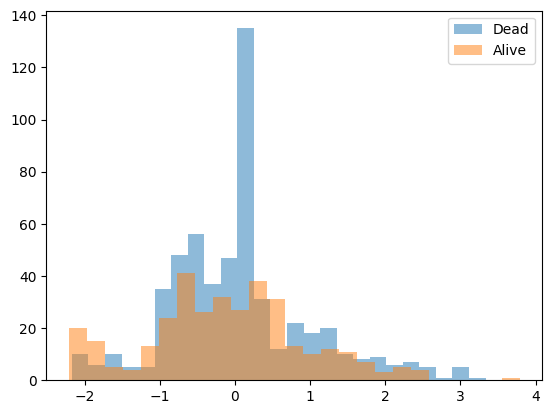

In [561]:
# Pclass에 따른 Survived(사망자/생존자) 분포
hist1 = df_train[df_train['Survived']==0]['Age']
hist2 = df_train[df_train['Survived']==1]['Age']
plt.hist(hist1, label='Dead', bins=25, alpha=0.5)
plt.hist(hist2, label='Alive', bins=25, alpha=0.5)
plt.legend(loc=0)

### 상관관계 분석

In [563]:
# 상관관계 계산
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
df_train[cols_to_corr].corr().round(2)

([<matplotlib.axis.YTick at 0x78d96d1ec750>,
 [Text(0, 0.5, 'Pclass'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'SibSp'),
  Text(0, 3.5, 'Parch'),
  Text(0, 4.5, 'Fare'),
  Text(0, 5.5, 'Name_has_title')])

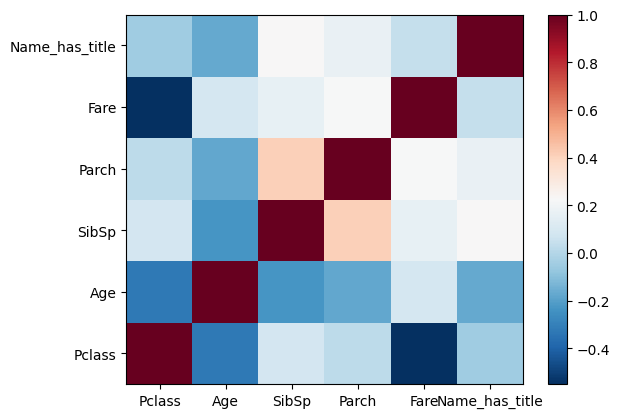

In [ ]:
# 상관관계 시각화
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(df_train[cols_to_corr].corr().round(2), cmap='RdBu_r')
fig.colorbar(c, ax=ax)
plt.xticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)
plt.yticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)

상관관계가 높은 변수의 경우 모델링 단계에 있어서 차원축소 등에 사용 가능
본 데이터는 ‘Fare’와 ‘Pclass’가 약한 음의 상관관계 -0.55, ‘SibSp’와 ‘Parch’가 약한 양의 상관관계 0.41 만이 있다.

## 모델링

모델링 단계 빅데이터 분석 방법론
- 모델의 과적합 방지와 일반화를 위해서 분석용 데이터셋을 훈련용 데이터와 모델의 검증 테스트하기 위한 데이터로 분할
- (가설 설정을 통하여 통계 모델을 만들거나) 기계 학습을 이용한 데이터의 분류, - 예측, 군집 등의 모델을 생성
- 필요 시 비정형 데이터 분석결과를 활용하여 통합 모델링 수행


### 전처리 함수 refactoring

- 훈련용 데이터에 적용한 전처리 방법들을, 테스트 데이터에도 적용해야 한다는 개념을 학습하기 위해 임의로 함수를 작성함
- scikit-learn의 pipeline이나 PyTorch와 같은 전용 프레임워크를 사용 할 수 있음

In [ ]:
# 전처리 함수 refactoring
def part5_preprocessing(df_orig, mode='train', replace_embarked=None, replace_age=None, scaler=None):
    df = df_orig.copy()
    # 결측치 처리 (훈련 데이터 상에서 파악한 최빈도값/평균값 공통 사용)
    if mode == 'train':
        replace_embarked = df_train['Embarked'].value_counts(dropna=False).idxmax()
        replace_age = df_train['Age'].mean().round(2)
    df['Embarked'] = df['Embarked'].fillna(replace_embarked)
    df['Age_isna'] = df['Age'].isna().astype(int)
    df['Age'] = df['Age'].fillna(replace_age)

    # 이상값 처리 - 없음

    # 데이터 정규화 (훈련 데이터 상에서 학습된 scaler 공통 사용)
    if mode == 'train':
        scaler = preprocessing.StandardScaler()
        scaler = scaler.fit(df[['Age', 'Fare']])
    df[['Age', 'Fare']] = scaler.transform(df[['Age','Fare']])

    # 데이터 인코딩
    df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
    df['Name_has_title'] = df['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

    # 전처리에 사용된 원본 필드, 분석에 불필요한 필드를 제외시킨다.
    df = df.drop(columns=['Name', 'Ticket','Cabin'])

    return df, replace_embarked, replace_age, scaler

### 훈련용 데이터 전처리 (일괄)

공통 함수화 한 커스텀 전처리 함수를 통해 학습 데이터와 테스트 데이터에 동일한 기준으로 전처리를 수행한다.

In [ ]:
# 학습 데이터 전처리 (일괄 적용)
df_train = pd.read_csv(colab_path + 'titanic/titanic_train.csv')
df_train, replace_embarked, replace_age, scaler = part5_preprocessing(df_train, 'train')

### 훈련/테스트 데이터 분할

- 모델 학습 이전에 모델 검증을 위한 테스트 데이터를 별도 분리하고 최종 검증에 사용
- 본 실습에서는 사전에 이미 분리하여 본 과정은 생략함.


### Feature (X), Label (y) 분리

- 지도학습의 경우 학습용 데이터가 Label을 포함하고 있어야 한다.
- Label이 어떤 필드인지를 지정해주기 위해 데이터에서 Feature와 Label을 분리


In [ ]:
# Feature(X), Label(y) 분리
target_col = 'Survived'
train_y = df_train[target_col]
train_X = df_train.drop(columns=[target_col])
train_X = train_X.set_index('PassengerId')

### 훈련/평가용 데이터 분할

모델을 평가하기 위한 평가용 데이터셋을 분할한다.

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련용/평가용 데이터 분할
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.3, random_state=42 )
train_X

,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
PassengerId,,,,,,,,,,,,
113,3,-0.592494,0,0,-0.486337,0,False,True,False,False,True,0
473,2,0.254004,1,2,-0.089684,0,True,False,False,False,True,0
454,1,1.485273,1,0,1.145664,0,False,True,True,False,False,0
446,1,-1.977672,0,2,0.999770,0,False,True,False,False,True,1
21,2,0.407912,0,0,-0.124920,0,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
696,2,1.716136,0,0,-0.376603,0,False,True,False,False,True,0
549,3,0.254004,1,1,-0.235157,0,False,True,False,False,True,0
18,2,0.000054,0,0,-0.386671,1,False,True,False,False,True,0


지도학습-분류를 위한 모델을 3개 선택하여 학습시키고 가장 좋은 성능을 보이는 모델을 최종 선택한다. 3가지 모델은 Logistic Regression, SVM, Decision Tree로 한다.


### 모델 #1 – Logistic Regression

로지스틱 회귀는 로지스틱 함수를 통해 데이터가 어떤 범주에 속할 확률을 0에서 1 사이 값으로 예측하고, 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류하는 지도학습 모델
Scikit-learn에서 제공하는 LogisticRegression 모듈을 사용할 경우 주요 파라미터는 다음과 같다.
학습시 설정 할 주요 파라미터는 penalty(규제) 종류와 그 강도(C) 임


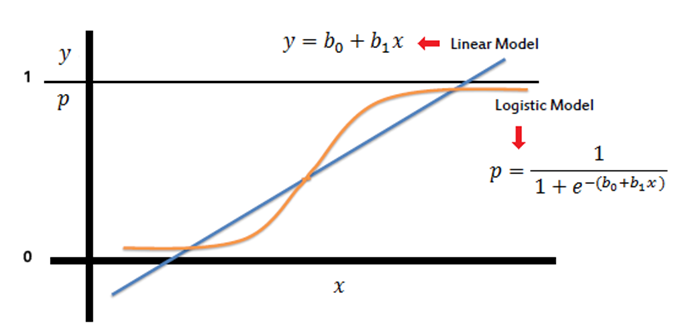

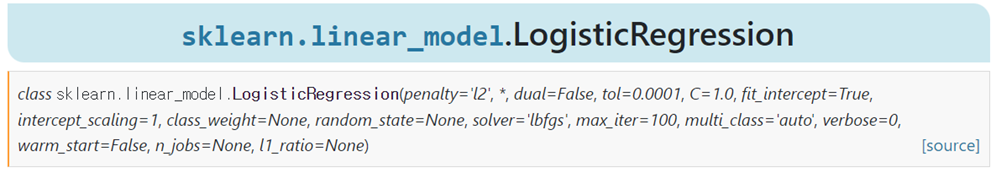

In [ ]:
# 모델 학습 및 예측
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=20, max_iter=1000, random_state=42)
model1.fit(train_X, train_y)

LogisticRegression(C=20, max_iter=1000, random_state=42)

### 모델 #2 – SVM 선택

SVM(Support Vector Machine, 서포트 벡터 머신)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선(평면)을 정의하고자 할 때 그 중 가장 큰 폭을 가지는 경계를 찾는 알고리즘
Scikit-learn에서 제공하는 SVC 모듈을 사용할 경우 주요 파라미터 중 학습 시 결정이 필요한 파라미터는 kernel 등이 있다.

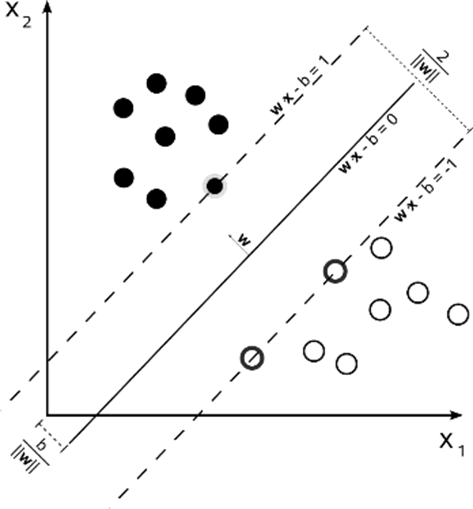

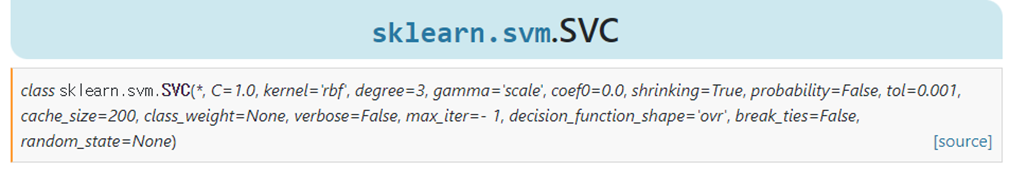

In [ ]:
# 모델 학습 및 예측
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear', probability=True, random_state=42)
model2.fit(train_X, train_y)

SVC(kernel='linear', probability=True, random_state=42)

### 모델 #3 – Random Forest 선택

- Random Forest는 의사결정나무의 앙상블 버전 알고리즘
- sklearn.ensemble.RandomForestClassifier를 통해 구현할 수 있으며, Random Forest 알고리즘의 주의사항인 과적합을 제어하기 위해 max_depth, min_samples_split 파라미터 최적화 필요


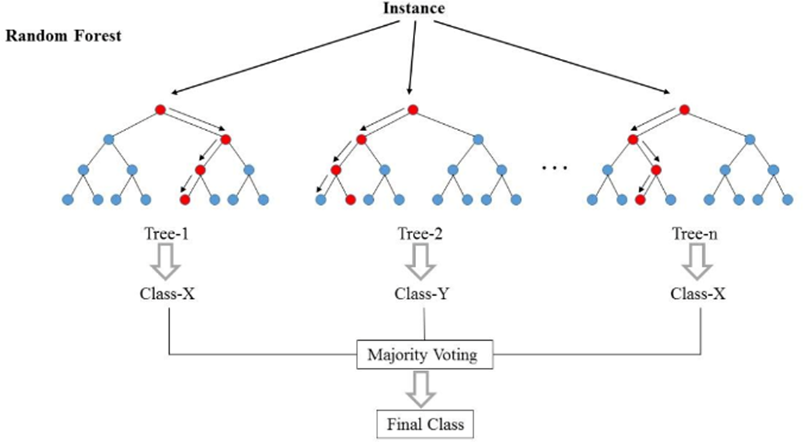

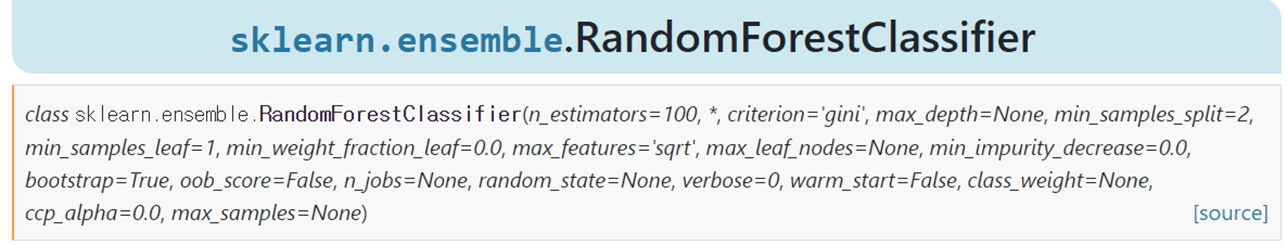

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [ ]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth = 3, random_state=42)
model3.fit(train_X, train_y)

RandomForestClassifier(max_depth=3, random_state=42)

## 모델 평가 및 검증

모델 평가 및 검증 단계 빅데이터 분석 방법론
- 프로젝트 정의서의 평가 기준에 따라 모델의 완성도를 평가
- 데이터 분석 목적 및 데이터셋 특성에 따라 모델 평가 방법은 다양
- 모델 훈련 및 평가에 활용된 데이터가 아닌 별도의 데이터 (운영용 데이터) 를 확보하여 모델의 객관성과 실무 적용성을 검증
- 요구되는 성능 목표에 미달하는 경우 모델 튜닝 작업을 수행


### 모델 #1 – Logistic Regression 평가 (Validation 데이터 기준)

In [ ]:
# 모델 평가
print(model1.score(train_X, train_y))  # accuracy
print(model1.score(val_X, val_y))

0.8188073394495413
0.7807486631016043


### 모델 #2 – SVM (Validation 데이터 기준)

In [ ]:
# 모델 평가
print(model2.score(train_X, train_y))  # accuracy
print(model2.score(val_X, val_y))

0.8027522935779816
0.7967914438502673


### 모델 #3 – Random Forest (Validation 데이터 기준)

In [ ]:
# 모델 평가
print(model3.score(train_X, train_y))  # accuracy
print(model3.score(val_X, val_y))

0.8256880733944955
0.7807486631016043


### 3가지 모델 성능 비교 (AUC Score)

In [ ]:
# AUC Score
from sklearn.metrics import roc_auc_score
print('AUC value (Logistic Regression): {}'.format(roc_auc_score(val_y, model1.predict(val_X))))
print('AUC value (SVM): {}'.format(roc_auc_score(val_y, model2.predict(val_X))))
print('AUC value (RandomForest): {}'.format(roc_auc_score(val_y, model3.predict(val_X))))

AUC value (Logistic Regression): 0.7750322580645161
AUC value (SVM): 0.7870322580645162
AUC value (RandomForest): 0.7587741935483873


### 3가지 모델 성능 비교 (ROC Curve Plotting)

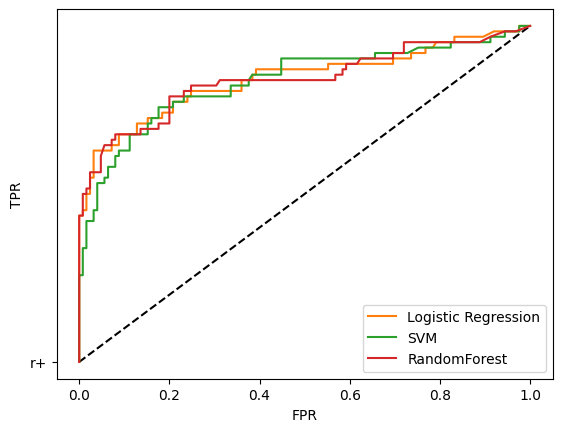

In [ ]:
# ROC Curve 플롯팅
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val_y, model1.predict_proba(val_X)[:,1])
plt.plot([0,1], [0,1], "k--", "r+") #0.5 기준선
plt.plot(fpr, tpr, label='Logistic Regression')
fpr2, tpr2, thresholds2 = roc_curve(val_y, model2.predict_proba(val_X)[:,1])
plt.plot(fpr2, tpr2, label='SVM')
fpr3, tpr3, thresholds3 = roc_curve(val_y, model3.predict_proba(val_X)[:,1])
plt.plot(fpr3, tpr3, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)

## 모델 적용 및 운영방안 수립

모델 적용및 운영방안 수립 단계 빅데이터 분석 방법론
- 모델을 운영시스템에 적용하는데 필요한 모델에 대한 알고리즘 설명서 작성
- 모델의 안정적 운영을 모니터링하는 방안을 수립


### 모델 저장

- 실제 운영환경에서는 모델을 학습하는 시스템과 실시간 운영 시스템이 분리된 경우가 많다.
- 학습된 모델을 버전 관리하고 운영시스템에 업데이트 하는 관리가 필요
- pickle 형태로 저장하고 예측이 필요한 시점에 해당 모델을 로드해서 이용 예 설명

In [ ]:
import pickle
# 모델 저장
# AUC Score 기준 가장 성능이 좋았던 Logistic Regression 모델을 저장한다.
with open(colab_path + 'titanic/saved_model.pickle','wb') as fw:
    pickle.dump(model1, fw)

### 모델 로드

In [ ]:
# 모델 로드
with open(colab_path + 'titanic/saved_model.pickle','rb') as f:
    model = pickle.load(f)

### 테스트용 데이터 전처리

In [ ]:
# 테스트 데이터 전처리
df_test = pd.read_csv(colab_path + '/titanic/titanic_test.csv')
df_test, replace_embarked, replace_age, scaler = part5_preprocessing(df_test, 'test', replace_embarked, replace_age, scaler)
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
0,892,3,0.369435,0,0,-0.490783,0,False,True,False,True,False,0
1,893,3,1.331365,1,0,-0.507479,0,True,False,False,False,True,0
2,894,2,2.485680,0,0,-0.453367,0,False,True,False,True,False,0
3,895,3,-0.207722,0,0,-0.474005,0,False,True,False,False,True,0
4,896,3,-0.592494,1,1,-0.401017,0,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000054,0,0,-0.486337,1,False,True,False,False,True,0
414,1306,1,0.715730,0,0,1.544246,0,True,False,True,False,False,1
415,1307,3,0.677253,0,0,-0.502445,0,False,True,False,False,True,0
416,1308,3,0.000054,0,0,-0.486337,1,False,True,False,False,True,0


In [ ]:
# 결측치 처리
# 테스트 데이터 중 1건에 'Fare'에 대한 결측치가 존재하므로 결측치를 train 데이터의 평균값으로 대체한다.
replace_fare = df_train['Fare'].mean().round(2)
df_test['Fare'] = df_test['Fare'].fillna(replace_fare)
test_X = df_test.set_index('PassengerId')

### 생존률 예측 (테스트용 데이터)

In [ ]:
# 최종 생존율 예측
pred_y = model.predict(test_X)
df_result = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived': pred_y})
df_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
